In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from datetime import datetime, timedelta

In [4]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
#Para que se vean los gráficos en el notebook
%matplotlib inline
#Para que se vean los gráficos en alta resolución
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster") #paper, notebook, talk, poster
sns.set(rc={"figure.figsize": (8.,4.)}) #Tamaño de las figuras
sns.set_style("whitegrid") #darkgrid, whitegrid, dark, white, ticks

In [5]:
data= pd.read_csv(r'C:\Users\Computador\OneDrive\Documentos\Gamma\Python\Scraping_infojobs\data2_infojobs.csv', sep= ',')

In [6]:
df= data.copy()

In [7]:
def fecha_publicada1(fecha):
    if '(Publicada de nuevo)' in fecha:
        fecha = fecha.replace('(Publicada de nuevo)', '')
        return fecha
    else:
        return fecha

In [8]:
def fecha_publicada2(fecha):
    numero= ''
    if 'Hace' in fecha:
        lista_f= fecha.split()

        if 'd' in lista_f[1]:
            for e in lista_f[1]:
                if e.isnumeric():
                    numero+= e
                    return numero
        elif 'h' in lista_f[1]:
            for l in lista_f[1]:
                if l.isnumeric():
                    numero+=l
                    fecha2 = int(numero)/24
                    return fecha2
        elif 'm' in lista_f[1]:
            for c in lista_f[1]:
                if c.isnumeric():
                    numero+=c
                    fecha2 = int(numero)/1140
                    return fecha2
        else:
            return fecha
    else:
        return fecha

In [9]:
df['publicada']= df['publicada'].apply(fecha_publicada1)

In [10]:
df['publicada']= df['publicada'].apply(fecha_publicada2)

In [11]:
def fecha_publicada_definitiva(fecha):
    
    if fecha in ['4', '5', '1', '2', '3', '6']:
        fecha_extraccion = datetime(2024, 3, 5)
        nueva_fecha = fecha_extraccion - timedelta(days=int(fecha))
        return nueva_fecha
    if fecha in [0.08333333333333333, 0.041666666666666664, 0.16666666666666666, 0.0043859649122807015, 0.125, 0.0008771929824561404, 0.0017543859649122807]:
        nueva_fecha = datetime(2024, 3, 5)
        return nueva_fecha
    else:
        if 'ene' in fecha:
            fecha= fecha.replace('ene', 'jan')
            fecha= '2024 '+str(fecha)
            nueva_fecha= pd.to_datetime(fecha)
            return nueva_fecha
        if 'feb' in fecha:
            fecha= '2024 '+fecha
            nueva_fecha= pd.to_datetime(fecha)
            return nueva_fecha
        else: return fecha
    

In [12]:
df['publicada']= df['publicada'].apply(fecha_publicada_definitiva)

In [13]:
df.publicada.unique()

<DatetimeArray>
['2024-02-28 00:00:00', '2024-02-29 00:00:00', '2024-02-19 00:00:00',
 '2024-03-05 00:00:00', '2024-02-21 00:00:00', '2024-03-02 00:00:00',
 '2024-03-01 00:00:00', '2024-02-09 00:00:00', '2024-02-06 00:00:00',
 '2024-01-23 00:00:00', '2024-03-04 00:00:00', '2024-01-16 00:00:00',
 '2024-02-27 00:00:00', '2024-02-14 00:00:00', '2024-02-12 00:00:00',
 '2024-02-15 00:00:00', '2024-02-05 00:00:00', '2024-02-20 00:00:00',
 '2024-02-02 00:00:00', '2024-01-18 00:00:00', '2024-02-26 00:00:00',
 '2024-02-23 00:00:00', '2024-02-22 00:00:00', '2024-02-16 00:00:00',
 '2024-02-13 00:00:00', '2024-02-08 00:00:00', '2024-01-24 00:00:00',
 '2024-01-15 00:00:00', '2024-01-12 00:00:00', '2024-01-11 00:00:00',
 '2024-02-07 00:00:00', '2024-01-30 00:00:00', '2024-02-01 00:00:00',
 '2024-01-22 00:00:00', '2024-02-24 00:00:00', '2024-01-25 00:00:00',
 '2024-01-26 00:00:00', '2024-02-18 00:00:00', '2024-01-31 00:00:00',
 '2024-01-29 00:00:00', '2024-01-21 00:00:00', '2024-01-19 00:00:00',
 '20

In [14]:
def salario_anual_mensual(salario):
    lista_salario = salario.split('-')
    salario_nuevo= lista_salario[-1]
    tipo=''
    for e in salario_nuevo.split():
        if e == 'Bruto/año' or e == 'Bruto/mes' or e == 'Bruto/hora':
            return e
    return 'Bruto/año'
    

In [15]:
def salario(salario):
    if salario == 'Salario no disponible':
        return salario
    else:
        try:
            lista_salario = salario.split()
            salario_nuevo= lista_salario[0].replace('.','')  
            return int(salario_nuevo)
        except:
            lista_salario = salario.split()
            salario_nuevo= lista_salario[2].replace('.','')
            return int(salario_nuevo)

In [16]:
df['tipo_salario']= df['salario'].apply(salario_anual_mensual)

In [17]:
df.tipo_salario.unique()

array(['Bruto/año', 'Bruto/mes', 'Bruto/hora'], dtype=object)

In [18]:
df['salario']= df['salario'].apply(salario)

In [19]:
df.salario.unique()

array(['Salario no disponible', 44000, 27000, 450, 24000, 18000, 25000,
       21000, 12000, 36000, 1600, 30000, 33000, 40000, 750, 8000, 20000,
       22000, 28000, 26000, 42000, 29000, 30, 39000, 16000, 50000, 600,
       14000, 15000, 2500, 900, 23000, 1300, 2300, 1400, 43000, 45000,
       1200, 19000], dtype=object)

In [20]:
sali= '19.000\xa0€ - 21.000\xa0€ Bruto/año'

In [69]:
df.sample(10)

,fecha_extraccion,publicada,tipo_empleo,titulo,link_oferta,empresa,link_empresa,ubicacion,tipo_contrato,modalidad,jornada,salario,tipo_salario
43,2024-03-05,2024-03-05,Analista de datos,Analista Control de Calidad,//www.infojobs.net/les-franqueses-del-valles/a...,MORCHEM,https://www.infojobs.net/morchem/em-i975356485...,Les Franqueses del Vallès,Contrato indefinido,Presencial,Jornada completa,Salario no disponible,Bruto/año
73,2024-03-05,2024-02-27,Analista de datos,Analista Business Intelligence para IT,//www.infojobs.net/madrid/analista-business-in...,Grupo empresarial dedicado a la recuperacion i...,https://www.infojobs.net/grupo-empresarial-ded...,Madrid,Contrato indefinido,Híbrido,Jornada completa,Salario no disponible,Bruto/año
170,2024-03-05,2024-02-26,Analista de datos,Business Analyst / QA,//www.infojobs.net/madrid/business-analyst-qa/...,DIMATICA,https://dimatica.ofertas-trabajo.infojobs.net,Madrid,Contrato indefinido,Híbrido,Jornada completa,Salario no disponible,Bruto/año
28,2024-03-05,2024-02-15,Analista de datos,Consutor o Analista de datos Pricing Híbrido (...,//www.infojobs.net/madrid/consutor-analista-da...,Abalia,https://abalia.ofertas-trabajo.infojobs.net,Madrid,Contrato indefinido,Híbrido,Jornada completa,30000,Bruto/año
19,2024-03-05,2024-03-02,Analista de datos,Analista de Pricing,//www.infojobs.net/madrid/analista-pricing/of-...,PELAYO,https://www.infojobs.net/pelayo/em-i9625574245...,Madrid,Contrato indefinido,Híbrido,Jornada completa,Salario no disponible,Bruto/año
41,2024-03-05,2024-03-05,Analista de datos,ANALISTA DE SISTEMAS,//www.infojobs.net/valencia/analista-sistemas/...,Fermax Technologies,https://www.infojobs.net/fermax-technologies/e...,Valencia,Contrato indefinido,No especifica,Jornada completa,Salario no disponible,Bruto/año
143,2024-03-05,2024-03-01,Analista de datos,"Analistas de Software (Java, Angular, Mobile...)",//www.infojobs.net/murcia/analistas-software-j...,NTT DATA ofertas de empleo profesionales,https://nttdata.ofertas-trabajo.infojobs.net,Murcia,Contrato indefinido,Híbrido,Jornada completa,Salario no disponible,Bruto/año
6,2024-03-05,2024-03-05,Analista de datos,Analista de datos (electricidad y gas),//www.infojobs.net/madrid/analista-datos-elect...,BOSLAN INGENIERIA Y CONSULTORIA,https://www.infojobs.net/boslan-ingenieria-y-c...,Madrid,Contrato indefinido,Híbrido,Jornada completa,Salario no disponible,Bruto/año
104,2024-03-05,2024-02-29,Analista de datos,ANALISTA ORGÁNICO 100% REMOTO,//www.infojobs.net/madrid/analista-organico-10...,AKKODIS,https://akkodis.ofertas-trabajo.infojobs.net,Madrid,Contrato indefinido,Solo teletrabajo,Jornada completa,Salario no disponible,Bruto/año
20,2024-03-05,2024-03-04,Analista de datos,ANALISTA de LABORATORIO Químico-Físico TURNO N...,//www.infojobs.net/torrejon-de-ardoz/analista-...,Laboratorios Medicamentos Internacionales,https://medinsa.ofertas-trabajo.infojobs.net,Torrejón de Ardoz,Contrato de duración determinada,Presencial,Jornada completa,21000,Bruto/año


In [22]:
#df.to_csv('df_arreglado.csv', index= False)

C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\451451100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x=df.tipo_empleo, order=df.tipo_empleo.value_counts().index, palette= "Set2")


Text(0.5, 1.0, 'Cantidad de Empleos por Tipo')

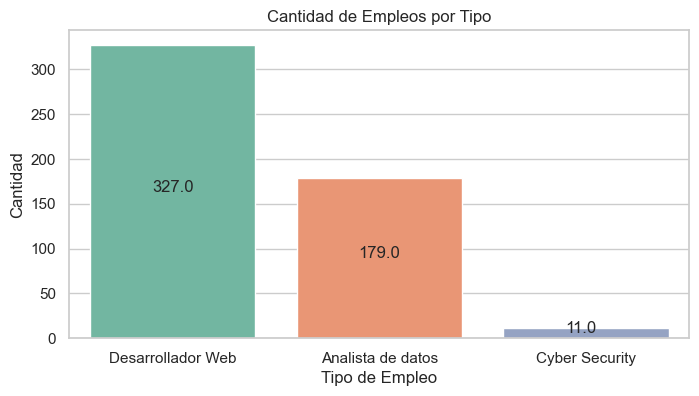

In [23]:
sns.set(style="whitegrid")
ax= sns.countplot(x=df.tipo_empleo, order=df.tipo_empleo.value_counts().index, palette= "Set2")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))
plt.xlabel('Tipo de Empleo')
plt.ylabel('Cantidad')
plt.title('Cantidad de Empleos por Tipo')

In [24]:
df_data=df.loc[df['tipo_empleo']=='Analista de datos']
df_cyber=df.loc[df['tipo_empleo']=='Cyber Security']
df_web= df.loc[df['tipo_empleo']=='Desarrollador Web']

In [25]:
df_web.loc[df['salario'] != 'Salario no disponible']

,fecha_extraccion,publicada,tipo_empleo,titulo,link_oferta,empresa,link_empresa,ubicacion,tipo_contrato,modalidad,jornada,salario,tipo_salario
190,2024-03-05,2024-03-05,Desarrollador Web,Desarrollador web frontend senior (REACT + Nod...,//www.infojobs.net/madrid/desarrollador-web-fr...,SAMANA DIGITAL,https://samanadigital.ofertas-trabajo.infojobs...,Madrid,Contrato indefinido,Solo teletrabajo,Jornada indiferente,36000,Bruto/año
193,2024-03-05,2024-03-05,Desarrollador Web,Desarrollador/a web,//www.infojobs.net/santa-cruz-de-tenerife/desa...,VOLENDAY SL.,https://www.infojobs.net/volenday-sl./em-i9849...,Santa Cruz de Tenerife,Contrato indefinido,Híbrido,Jornada completa,14000,Bruto/año
196,2024-03-05,2024-03-01,Desarrollador Web,Desarrollador aplicaciones web,//www.infojobs.net/castellon-de-la-plana-caste...,Planatec Software,https://www.infojobs.net/planatec-software/em-...,Castellón de la Plana/Castelló de la Plana,Contrato indefinido,Híbrido,Jornada completa,15000,Bruto/año
197,2024-03-05,2024-02-29,Desarrollador Web,Desarrollador senior paginas web,//www.infojobs.net/barcelona/desarrollador-sen...,ALGORITCOM GROUP S.L.,https://www.infojobs.net/algoritcom-group-s.l....,Barcelona,Contrato indefinido,Híbrido,Jornada completa,36000,Bruto/año
199,2024-03-05,2024-02-27,Desarrollador Web,Desarrollador/a Web,//www.infojobs.net/paterna/desarrollador-web/o...,HAYS Working for your Tomorrow,https://hays.ofertas-trabajo.infojobs.net,Paterna,Contrato indefinido,Presencial,Jornada completa,21000,Bruto/año
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2024-03-05,2024-02-26,Desarrollador Web,ASP Classic developer,//www.infojobs.net/getxo/asp-classic-developer...,BOYCOR,https://www.infojobs.net/boycor/em-ie771ecbec0...,Getxo,Contrato indefinido,Híbrido,Jornada completa,36000,Bruto/año
495,2024-03-05,2024-02-28,Desarrollador Web,Drupal Developer,//www.infojobs.net/madrid/drupal-developer/of-...,BOYCOR,https://www.infojobs.net/boycor/em-ie771ecbec0...,Madrid,Contrato indefinido,Solo teletrabajo,Jornada completa,22000,Bruto/año
496,2024-03-05,2024-02-28,Desarrollador Web,Full Stack developer,//www.infojobs.net/pamplona-iruna/full-stack-d...,MARKARIAN,https://www.infojobs.net/markarian/em-i9855494...,Pamplona/Iruña,Contrato indefinido,Híbrido,Jornada completa,30000,Bruto/año
497,2024-03-05,2024-02-28,Desarrollador Web,Programador/a FullStack Java y JavaScript (100...,//www.infojobs.net/madrid/programador-fullstac...,Second Window,https://secondwindow.ofertas-trabajo.infojobs.net,Madrid,Contrato indefinido,Solo teletrabajo,Jornada completa,33000,Bruto/año


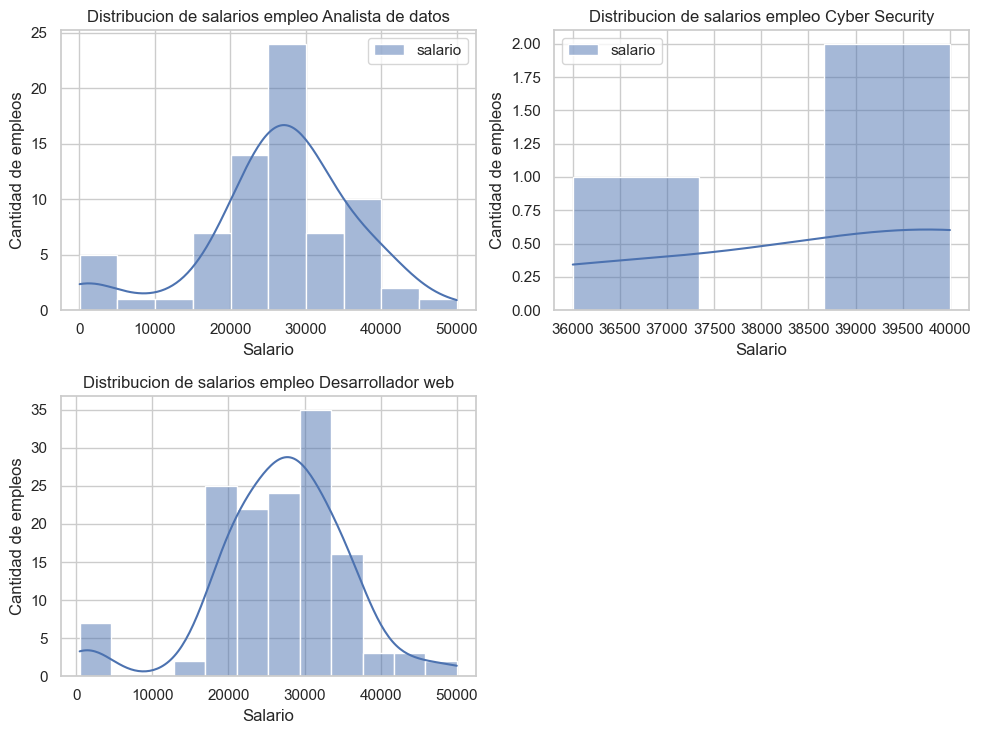

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7.5))

# Subplot 1
ax1 = sns.histplot(data=df_data.loc[df['salario'] != 'Salario no disponible'], ax=axs[0, 0], kde=True)
ax1.set_title('Distribucion de salarios empleo Analista de datos')
ax1.set_xlabel('Salario')
ax1.set_ylabel('Cantidad de empleos')
ax1.grid(True)

# Subplot 2
ax2 = sns.histplot(data=df_cyber.loc[df['salario'] != 'Salario no disponible'], ax=axs[0, 1], kde=True)
ax2.set_title('Distribucion de salarios empleo Cyber Security')
ax2.set_xlabel('Salario')
ax2.set_ylabel('Cantidad de empleos')
ax2.grid(True)

# Subplot 3
ax3 = sns.histplot(data=df_web.loc[df['salario'] != 'Salario no disponible'], x="salario", ax=axs[1, 0], kde=True)
ax3.set_title('Distribucion de salarios empleo Desarrollador web')
ax3.set_xlabel('Salario')
ax3.set_ylabel('Cantidad de empleos')
ax3.grid(True)

# Subplot 4 (sin datos, solo como ejemplo)
axs[1, 1].axis('off')  # Apagar el último subplot

plt.tight_layout()

C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\1453494718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='modalidad', data=df_data, palette='Set2', order=df_data['modalidad'].value_counts().index, ax=axs[0, 0])
C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\1453494718.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\1453494718.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x='modalidad', data=df_cyber, palette='Set2', order=df_data['modalidad

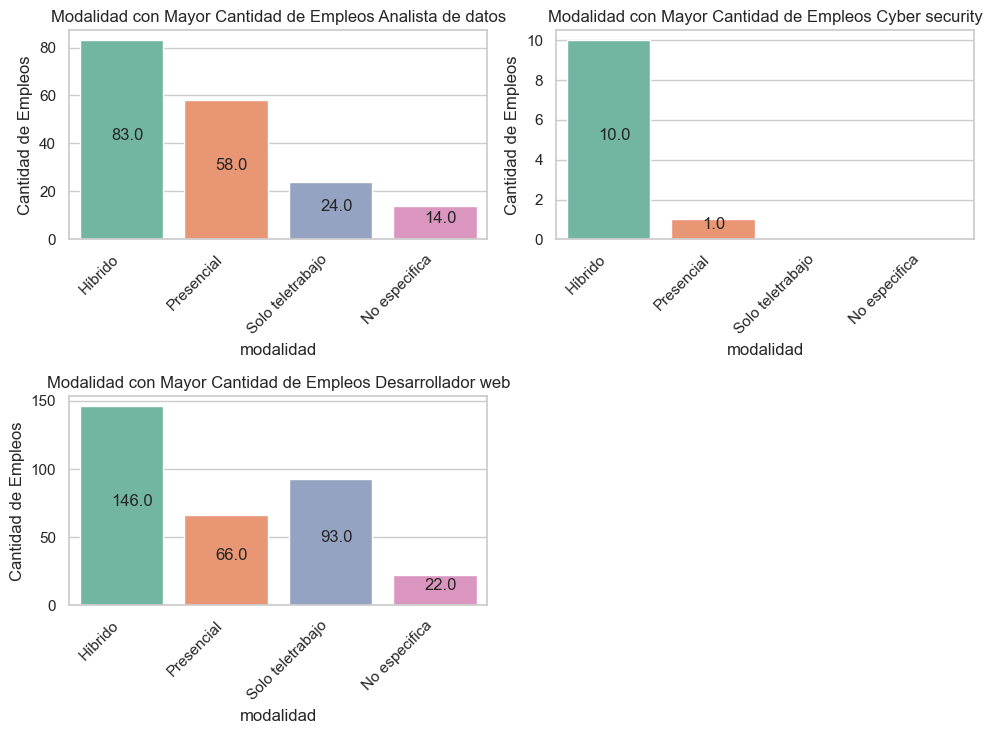

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7.5))

# Subplot 1
ax1 = sns.countplot(x='modalidad', data=df_data, palette='Set2', order=df_data['modalidad'].value_counts().index, ax=axs[0, 0])

ax1.set_xlabel('modalidad')
ax1.set_ylabel('Cantidad de Empleos')
ax1.set_title('Modalidad con Mayor Cantidad de Empleos Analista de datos')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))

# Subplot 2
ax2 = sns.countplot(x='modalidad', data=df_cyber, palette='Set2', order=df_data['modalidad'].value_counts().index, ax=axs[0, 1])

ax2.set_xlabel('modalidad')
ax2.set_ylabel('Cantidad de Empleos')
ax2.set_title('Modalidad con Mayor Cantidad de Empleos Cyber security')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))

# Subplot 3
ax3 = sns.countplot(x='modalidad', data=df_web, palette='Set2', order=df_data['modalidad'].value_counts().index, ax=axs[1, 0])

ax3.set_xlabel('modalidad')
ax3.set_ylabel('Cantidad de Empleos')
ax3.set_title('Modalidad con Mayor Cantidad de Empleos Desarrollador web')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
for p in ax3.patches:
    ax3.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))

# Subplot 4 (sin datos, solo como ejemplo)
axs[1, 1].axis('off')  # Apagar el último subplot

plt.tight_layout()


C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\96512189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='ubicacion', data=df_data, palette='Set2', order=df_data['ubicacion'].value_counts().index[:5], ax=axs[0, 0])
C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\96512189.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\96512189.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x='ubicacion', data=df_cyber, palette='Set2', order=df_data['ubicacion']

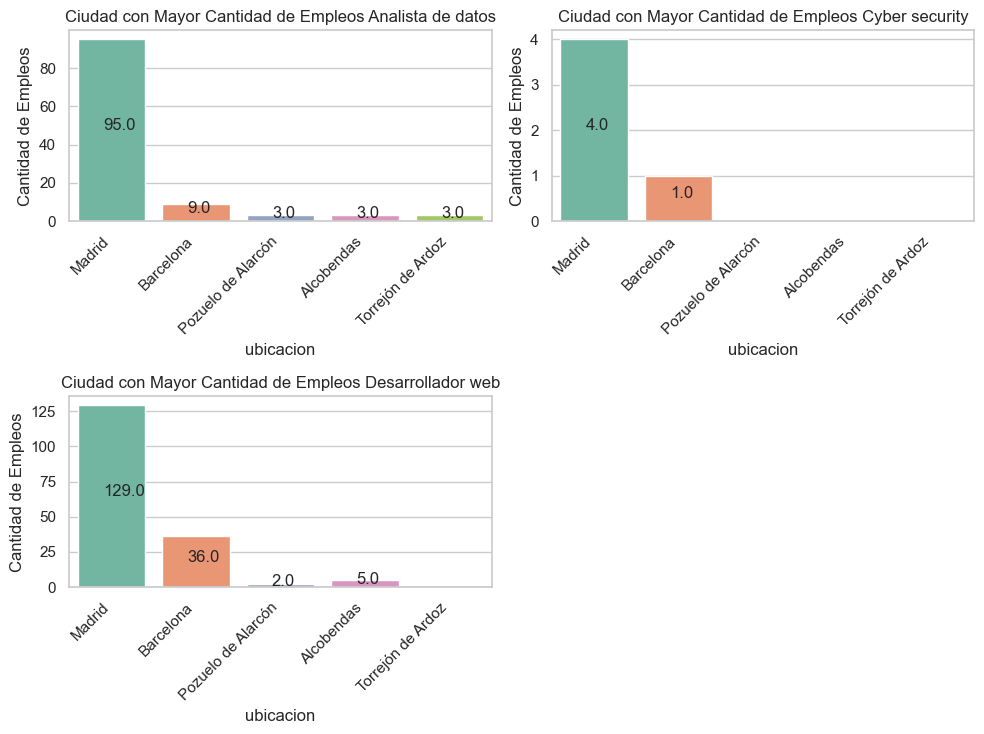

In [66]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7.5))

# Subplot 1
ax1 = sns.countplot(x='ubicacion', data=df_data, palette='Set2', order=df_data['ubicacion'].value_counts().index[:5], ax=axs[0, 0])

ax1.set_xlabel('ubicacion')
ax1.set_ylabel('Cantidad de Empleos')
ax1.set_title('Ciudad con Mayor Cantidad de Empleos Analista de datos')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))

# Subplot 2
ax2 = sns.countplot(x='ubicacion', data=df_cyber, palette='Set2', order=df_data['ubicacion'].value_counts().index[:5], ax=axs[0, 1])

ax2.set_xlabel('ubicacion')
ax2.set_ylabel('Cantidad de Empleos')
ax2.set_title('Ciudad con Mayor Cantidad de Empleos Cyber security')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))

# Subplot 3
ax3 = sns.countplot(x='ubicacion', data=df_web, palette='Set2', order=df_data['ubicacion'].value_counts().index[:5], ax=axs[1, 0])

ax3.set_xlabel('ubicacion')
ax3.set_ylabel('Cantidad de Empleos')
ax3.set_title('Ciudad con Mayor Cantidad de Empleos Desarrollador web')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
for p in ax3.patches:
    ax3.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))

# Subplot 4 (sin datos, solo como ejemplo)
axs[1, 1].axis('off')  # Apagar el último subplot

plt.tight_layout()

In [61]:
data_filtrado= df_data.loc[(df_data['salario'] !='Salario no disponible') & (df_data['tipo_salario'] =='Bruto/año') & (df_data['modalidad'] !='No especifica')].groupby('modalidad').agg({"salario":"mean"}).sort_values(by= 'salario')
cyber_filtrado= df_cyber.loc[(df_cyber['salario'] !='Salario no disponible') & (df_cyber['tipo_salario'] =='Bruto/año') & (df_cyber['modalidad'] !='No especifica')].groupby('modalidad').agg({"salario":"mean"}).groupby('modalidad').agg({"salario":"mean"}).sort_values(by= 'salario')
web_filtrado= df_web.loc[(df_web['salario'] !='Salario no disponible') & (df_web['tipo_salario'] =='Bruto/año') & (df_web['modalidad'] !='No especifica')].groupby('modalidad').agg({"salario":"mean"}).groupby('modalidad').agg({"salario":"mean"}).sort_values(by= 'salario')

In [63]:
web_filtrado

,salario
modalidad,
Presencial,25892.857143
Híbrido,28800.0
Solo teletrabajo,29939.393939


C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\3598815742.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='modalidad', y='salario', data=data_filtrado, ci=None, palette='viridis', ax=axs[0, 0])
C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\3598815742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='modalidad', y='salario', data=data_filtrado, ci=None, palette='viridis', ax=axs[0, 0])
C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\3598815742.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(x='modalidad', y='salario', data=cyber_filtrado, ci=None, palette='viridis', ax=axs[0, 1])
C:\Users\Computador\AppData\Local\Temp\ipykernel_6380\3598815742.py:14: FutureWarning:

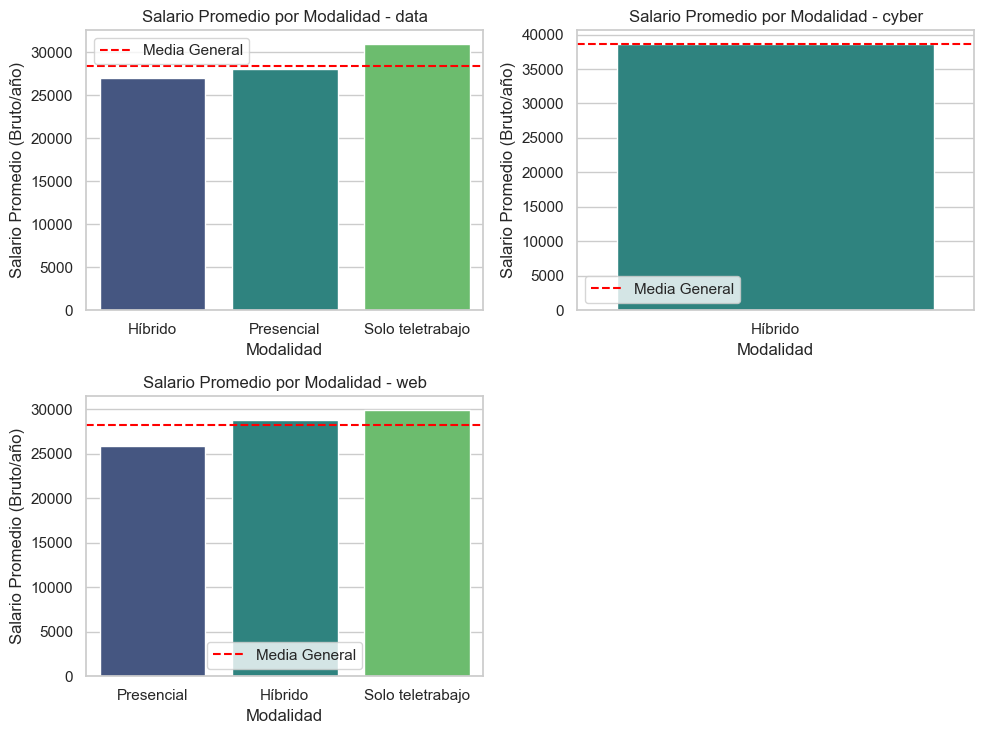

In [64]:
general_data = df_data.loc[(df_data['salario'] != 'Salario no disponible') & (df_data['tipo_salario'] == 'Bruto/año')]['salario'].mean()
general_cyber= df_cyber.loc[(df_cyber['salario'] != 'Salario no disponible') & (df_cyber['tipo_salario'] == 'Bruto/año')]['salario'].mean()
general_web= df_web.loc[(df_web['salario'] != 'Salario no disponible') & (df_web['tipo_salario'] == 'Bruto/año')]['salario'].mean()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7.5))
ax1 = sns.barplot(x='modalidad', y='salario', data=data_filtrado, ci=None, palette='viridis', ax=axs[0, 0])
ax1.axhline(y=general_data, color='red', linestyle='--', label='Media General')
ax1.set_xlabel('Modalidad')
ax1.set_ylabel('Salario Promedio (Bruto/año)')
ax1.set_title('Salario Promedio por Modalidad - data')
ax1.legend()


ax2 = sns.barplot(x='modalidad', y='salario', data=cyber_filtrado, ci=None, palette='viridis', ax=axs[0, 1])
ax2.axhline(y=general_cyber, color='red', linestyle='--', label='Media General')
ax2.set_xlabel('Modalidad')
ax2.set_ylabel('Salario Promedio (Bruto/año)')
ax2.set_title('Salario Promedio por Modalidad - cyber')
ax2.legend()


ax3 = sns.barplot(x='modalidad', y='salario', data=web_filtrado, ci=None, palette='viridis', ax=axs[1, 0])
ax3.axhline(y=general_web, color='red', linestyle='--', label='Media General')
ax3.set_xlabel('Modalidad')
ax3.set_ylabel('Salario Promedio (Bruto/año)')
ax3.set_title('Salario Promedio por Modalidad - web')
ax3.legend()

axs[1, 1].axis('off')  # Apagar el último subplot

plt.tight_layout()